In [1]:
%matplotlib inline
import numpy as np
from cluster import *
from IPython.core.display import Image

**Import and normalize *roughness* and *fluidfactor* **

In [2]:
fluidfactor='fluidfactor'
vrange = !r.info -r {fluidfactor}
vmin = vrange[0].split('=')[1]
vmax = vrange[1].split('=')[1]
!r.mapcalc expression="normalized_fluidfactor=0+((({fluidfactor}-{vmin})*(1-0))/({vmax}-{vmin}))" --o 
print([vmin,vmax])
fluidfactor_range = !r.info -r normalized_fluidfactor
fluidfactor_range

   0%   3%   6%   9%  12%  15%  18%  21%  24%  27%  30%  33%  36%  39%  42%  45%  48%  51%  54%  57%  60%  63%  66%  69%  72%  75%  78%  81%  84%  87%  90%  93%  96%  99% 100%
['-21.42886', '-6.130437']


['min=2.68263199840338e-07', 'max=0.999999975545519']

In [3]:
roughness='roughness'
vrange = !r.info -r {roughness}
vmin = vrange[0].split('=')[1]
vmax = vrange[1].split('=')[1]
!r.mapcalc expression="normalized_roughness=0+((({roughness}-{vmin})*(1-0))/({vmax}-{vmin}))" --o 
print(vmin,vmax)
roughness_range = !r.info -r normalized_roughness
roughness_range

   0%   3%   6%   9%  12%  15%  18%  21%  24%  27%  30%  33%  36%  39%  42%  45%  48%  51%  54%  57%  60%  63%  66%  69%  72%  75%  78%  81%  84%  87%  90%  93%  96%  99% 100%
('-0.09443344', '3.705567')


['min=-4.62672533073906e-10', 'max=0.999999906491742']

**Load names of layers with morphological features**

In [4]:
img = np.load('features.npy')

**Append normalized backscatter to the list of layers**

In [5]:
img = list(img)
img.append('normalized_backscatter')
img.append('normalized_roughness')
img.append('normalized_fluidfactor')
img = np.asarray(img)

**Generate $N-Dimensional$ array to store the features layer**

In [6]:
imagegroup = img2array(img, npred=10)

**Compute  *BS-hybrid-derivative landform classes* **

Initializing clusters along diagonal of N-dimensional bounding box.


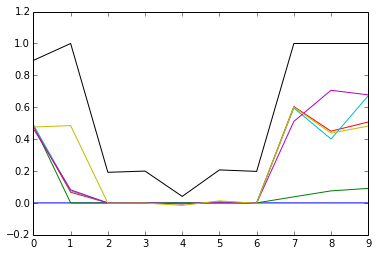

In [7]:
k = 7
cluster="cluster7dbs"
classifier = getKmeans(imagegroup=imagegroup, k=k)
spectralPlot(classifier[1])

In [8]:
writeGarray(m=classifier[0], mapname=cluster)

newmap cluster7dbs written to GRASS MAPSET


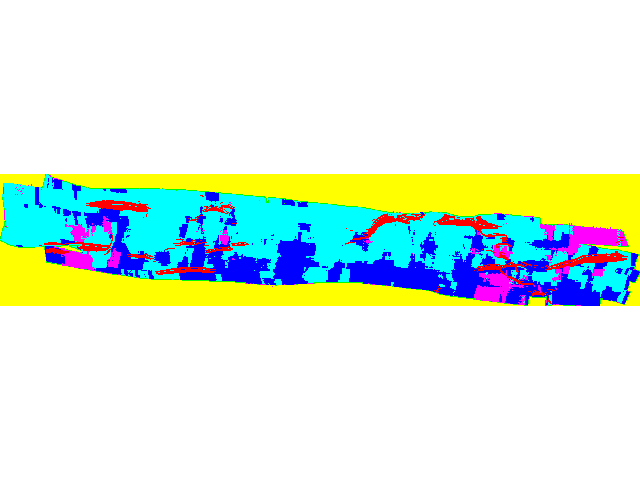

In [9]:
layer=cluster
!d.mon start=cairo --q output=TMP/{layer}.png --overwrite
!d.rast map={layer} --q
!d.mon stop=cairo --q
Image('TMP/'+layer+'.png')

In [10]:
!r.out.gdal input={cluster} output={cluster}.tif format=GTiff type=Float64 --o
!r.mapcalc expression="{cluster}_int=int({cluster})" --o 
!r.out.gdal input={cluster}_int output={cluster}_int.tif format=GTiff type=Byte --o 
filt=3
!r.neighbors input={cluster}_int output={cluster}_int_mode_{filt} method=mode size={filt} --o 
!r.out.gdal input={cluster}_int_mode_{filt} output={cluster}_int_mode_{filt}.tif format=GTiff type=Byte --o 

Checking GDAL data type and nodata value...
   2%   5%   8%  11%  14%  17%  20%  23%  26%  29%  32%  35%  38%  41%  44%  47%  50%  53%  56%  59%  62%  65%  68%  71%  74%  77%  80%  83%  86%  89%  92%  95%  98% 100%
Using GDAL data type <Float64>
Exporting raster data to GTiff format...
ERROR 6: SetColorTable() only supported for Byte or UInt16 bands in TIFF format.
   2%   5%   8%  11%  14%  17%  20%  23%  26%  29%  32%  35%  38%  41%  44%  47%  50%  53%  56%  59%  62%  65%  68%  71%  74%  77%  80%  83%  86%  89%  92%  95%  98% 100%
r.out.gdal complete. File <cluster7dbs.tif> created.
   0%   3%   6%   9%  12%  15%  18%

In [11]:
!r.report -i -e map={cluster} units=me,h,p null=* nsteps=255 --q

+-----------------------------------------------------------------------------+
|                         RASTER MAP CATEGORY REPORT                          |
|LOCATION: nc_basic_spm_grass7                        Thu May  5 14:34:39 2016|
|-----------------------------------------------------------------------------|
|          north: 4546466    east: 509140                                     |
|REGION    south: 4545764    west: 505748                                     |
|          res:         1    res:       1                                     |
|-----------------------------------------------------------------------------|
|MASK: none                                                                   |
|-----------------------------------------------------------------------------|
|MAP: (untitled) (cluster7dbs in user1)                                       |
|-----------------------------------------------------------------------------|
|             Category Information      